In [2]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [4]:
def diagrama_antena_satelite_itu_s672(δ):
    """
    Calcula o ganho da antena do satélite conforme a Recomendação ITU-R S.672.

    Parâmetro:
    δ (float ou np.ndarray): Ângulo fora do eixo da antena (graus).

    Retorna:
    float ou np.ndarray: Ganho da antena em dBi.
    """
    δb = 24.1  # graus
    Gm = 23  # dBi
    Y = 6.32 * δb * 10**(0.04*(Gm - 5))  # graus
    Lb = 0.25 * Gm - 5  # dBi

    δ = np.asarray(δ)
    G = np.empty_like(δ, dtype=float)

    condition1 = (δ >= 0) & (δ <= 2.58 * δb)
    condition2 = (δ > 2.58 * δb) & (δ <= 6.32 * δb)
    condition3 = (δ > 6.32 * δb) & (δ <= Y)
    condition4 = (δ > Y) & (δ <= 90)
    condition5 = (δ > 90) & (δ <= 180)

    G[condition1] = Gm - 3 * (δ[condition1] / δb) ** 2
    G[condition2] = Gm - 20
    G[condition3] = Gm - 20 + 25 * np.log10(6.32 * δb / δ[condition3])
    G[condition4] = 0
    G[condition5] = Lb

    G[~(condition1 | condition2 | condition3 | condition4 | condition5)] = np.nan

    if G.size == 1:
        return G.item()
    return G

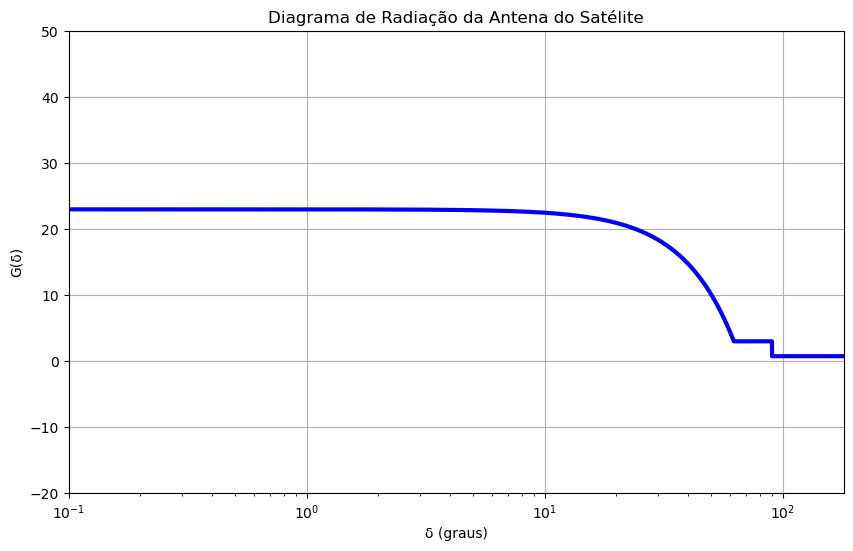

In [5]:
# Ângulos fora do eixo da antena (0 a 180 graus)
δ = np.linspace(0, 180, 5000)

# Calcular o ganho da antena
G = diagrama_antena_satelite_itu_s672(δ)

# Plotar o diagrama da antena
plt.figure(figsize=(10, 6))
plt.semilogx(δ, G, linewidth=3, color='b')
plt.title('Diagrama de Radiação da Antena do Satélite')
plt.xlabel('δ (graus)')
plt.ylabel('G(δ)')
plt.xlim(0.1, 180)
plt.ylim(-20, 50)
plt.grid(True)
plt.show()

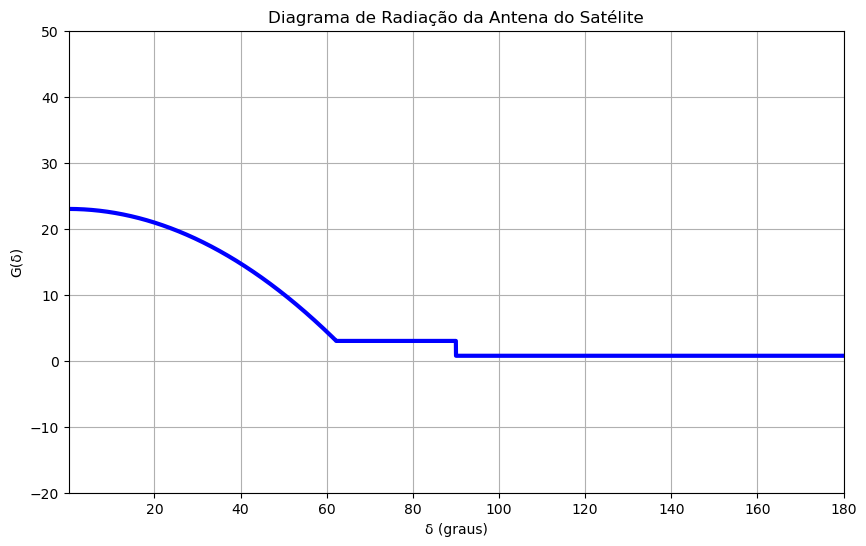

In [6]:
# Ângulos fora do eixo da antena (0 a 180 graus)
δ = np.linspace(0, 180, 5000)

# Calcular o ganho da antena
G = diagrama_antena_satelite_itu_s672(δ)

# Plotar o diagrama da antena
plt.figure(figsize=(10, 6))
plt.plot(δ, G, linewidth=3, color='b')
plt.title('Diagrama de Radiação da Antena do Satélite')
plt.xlabel('δ (graus)')
plt.ylabel('G(δ)')
plt.xlim(0.1, 180)
plt.ylim(-20, 50)
plt.grid(True)
plt.show()